<a href="https://colab.research.google.com/github/EdWangLoDaSc/Bayesian-Neural-Networks/blob/master/pretrained%20AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is necessary to use tensorflow 1.14.0 under the environment of Colab.

In [1]:
pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 47 kB/s 
     |████████████████████████████████| 488 kB 32.7 MB/s 
     |████████████████████████████████| 50 kB 8.7 MB/s 
     |████████████████████████████████| 3.1 MB 6.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
ERROR: pip's dependency resolver does not currently tak

In [2]:
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [3]:
import pandas as pd
import numpy as np
## TensorFlow
import tensorflow as tf
#tf.compat.v1.reset_default_graph()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
df = pd.read_csv('/content/content/MyDrive/CGAN_Regression/CGAN_code/Datasets/Datasets.csv')
df = df.drop(['Calculated-pChEMBL'], axis = 1).values

In [9]:
df = pd.read_csv('/content/content/MyDrive/pytorch-rbm-autoencoder-main/FP_3_512_D1.csv').values


# 1. Model Structure and Related Parameters

In [4]:
num_inputs = 512

## Encoder section
hidden_1 = 512//2       ## 256 (Number of nodes)
hidden_2 = hidden_1 //2  ## 128
hidden_3 = hidden_2 //2  ## 64

## Latent Space
hidden_4 = hidden_3 //2  ## 32

## Decoder 
hidden_5 = hidden_3      ## 64
hidden_6 = hidden_2      ## 128
hidden_7 = hidden_1      ## 256

num_outputs = num_inputs ## 512

In [5]:
## Hyper Parameters: 

learning_rate = 0.001

## Activation function

"""
Here we are using Rectified Linear Unit( ReLu). It is at the left for the user to test and experiment 
with other activation functions and learning rate
"""

activ_fn = tf.nn.relu

## Input Layer

"""
Defining Input data
"""

X = tf.compat.v1.placeholder(tf.float32,shape = [None,num_inputs])

## scaling keras.initializers.
#initializer = tf.keras.initializers.variance_scaling_initializer()
initializer = tf.contrib.layers.variance_scaling_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [6]:
## Weights(Parameters)
"""
Here we are randomly initializing the weights which are later updated based on the gradient descent and learning rate 
such that it minimizes the cost function
"""

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.Variable(initializer([hidden_3,hidden_4]),dtype=tf.float32)
w5 = tf.transpose(w4)
w6 = tf.transpose(w3)
w7 = tf.transpose(w2)
w8 = tf.transpose(w1)

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))
b4 = tf.Variable(tf.zeros(hidden_4))
b5 = b3
b6 = b2
b7 = b1
b8 = tf.Variable(tf.zeros(num_outputs))

hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
hid_layer6 = activ_fn(tf.matmul(hid_layer5,w6)+b6)
hid_layer7 = activ_fn(tf.matmul(hid_layer6,w7)+b7)
output_layer = activ_fn(tf.matmul(hid_layer7,w8)+b8)

In [10]:
## Loss Function(Cost function)

"""
Here we are defining the cost function, Minimizing loss between input and output layers
"""
np.random.seed(42)
loss = tf.reduce_mean(tf.square(output_layer - X))

optimizer = tf.train.AdamOptimizer(learning_rate)

## Optimizer
train = optimizer.minimize(loss)


## Initialzing
init = tf.global_variables_initializer()


saver = tf.train.Saver()

# 2. Start Training and Save as CKPT


In [11]:
## Training the model

"""
Epoch: Number of training steps/iterations
Batch Size: Number of obseravtions that are used during each iterations to update weights. 
"""
num_epochs =500
batch_size = 8

to_plot_220 = []
from sklearn.utils import shuffle
#df = shuffle(df) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot_220.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch,training_loss))
        
        
    """
    Saving the trained model
    """
    saver.save(sess,'./checkpoint_dir/my_model')

Epoch: 0 Loss: 0.07551410794258118
Epoch: 20 Loss: 0.03983686491847038
Epoch: 40 Loss: 0.03745010867714882
Epoch: 60 Loss: 0.03706039488315582
Epoch: 80 Loss: 0.035348646342754364
Epoch: 100 Loss: 0.0347425751388073
Epoch: 120 Loss: 0.034572746604681015
Epoch: 140 Loss: 0.03458477556705475
Epoch: 160 Loss: 0.035473570227622986
Epoch: 180 Loss: 0.03440234810113907
Epoch: 200 Loss: 0.03448972851037979
Epoch: 220 Loss: 0.03378237038850784
Epoch: 240 Loss: 0.03277839720249176
Epoch: 260 Loss: 0.03399577736854553
Epoch: 280 Loss: 0.034093379974365234
Epoch: 300 Loss: 0.032810017466545105
Epoch: 320 Loss: 0.03252910077571869
Epoch: 340 Loss: 0.03452388197183609
Epoch: 360 Loss: 0.031557269394397736
Epoch: 380 Loss: 0.03214198723435402
Epoch: 400 Loss: 0.03158273547887802
Epoch: 420 Loss: 0.032795630395412445
Epoch: 440 Loss: 0.033552009612321854
Epoch: 460 Loss: 0.031349316239356995
Epoch: 480 Loss: 0.03525518625974655


# 3. Load the model and Continue to train it on the LSD1 dataset


In [12]:
lsd1 = pd.read_csv('/content/drive/MyDrive/CGAN_Regression/CGAN_code/Datasets/Datasets.csv')
lsd1 = lsd1.drop(['Calculated-pChEMBL'], axis = 1).values


OSError: ignored

In [ ]:
import tensorflow as tf
with tf.Session() as sess:
  new_saver = tf.train.import_meta_graph('./checkpoint_dir/my_model.meta')
  new_saver.restore(sess, tf.train.latest_checkpoint('./checkpoint_dir'))



to_plot_pre = []
from sklearn.utils import shuffle
#df = shuffle(df) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, lsd1.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot_pre.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch,training_loss))
        
        
    """
    Saving the trained model
    """
    
    saver.save(sess,'./final_checkpoint/final_model')

Epoch: 0 Loss: 0.10110998898744583


KeyboardInterrupt: ignored

In [ ]:
## With the weights obtained from training earlier, lets obtains the feature vectors at the latent space
with tf.Session() as sess:
    saver.restore(sess,'./checkpoint_dir/final_model')
    res = hid_layer4.eval(feed_dict={X: lsd1}) 

res.to_csv('res.csv')

NotFoundError: ignored

In [ ]:
res

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.971119,0.708010,0.0,1.531945,3.129026,0.0,0.691859,1.486513,1.743162,1.349633,...,1.575900,0.932109,0.847057,1.045408,1.263589,0.541919,1.819888,0.899362,1.698281,2.833895
1,2.765610,4.070502,0.0,1.604277,5.405550,0.0,0.428894,1.722560,2.466619,1.960677,...,2.032835,1.854249,1.905217,2.628822,0.988939,1.282823,2.004048,0.992213,1.642628,1.627804
2,2.340017,4.628875,0.0,1.555720,5.978680,0.0,0.730973,1.439102,2.082943,1.659024,...,2.571778,1.711109,1.549374,2.062428,1.818226,1.256932,1.729711,1.615286,1.301171,1.335762
3,1.454097,1.238874,0.0,1.606725,1.952919,0.0,0.942727,1.968982,1.540220,1.673669,...,0.861158,1.138574,1.327691,0.270453,1.260636,1.614968,0.754679,1.304069,1.331764,2.824496
4,1.026815,1.241035,0.0,1.154527,0.310151,0.0,0.546079,1.210776,0.762127,1.278183,...,0.478828,1.153295,0.433902,1.892238,1.132090,1.190311,0.928300,1.088190,1.997479,1.954959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,1.472904,1.222170,0.0,0.279506,1.642460,0.0,1.025252,0.000000,1.780461,0.577346,...,1.229539,1.541503,1.569701,0.571175,1.706628,1.074508,1.715292,2.131420,2.365013,0.630113
927,1.910262,3.427852,0.0,1.390302,2.652615,0.0,2.321804,0.893241,3.165932,0.527149,...,2.129314,1.616196,0.902178,1.506641,0.006176,0.131902,1.846209,2.927191,2.462290,1.476778
928,1.663143,2.989021,0.0,0.616286,1.778342,0.0,1.505248,1.199605,2.607651,0.375065,...,2.007505,1.141599,0.982783,1.173786,0.099245,0.000000,1.717675,2.346229,2.089259,1.361008
929,2.209959,0.710210,0.0,1.903195,1.981587,0.0,0.312087,0.862177,2.338372,0.656626,...,0.723442,0.808668,0.578436,0.000000,1.664659,0.724790,1.355473,2.041394,0.688967,2.426601


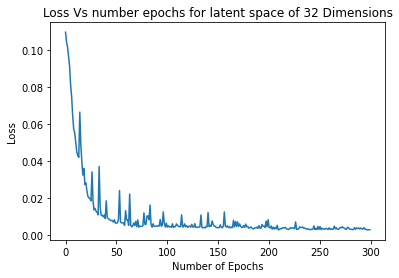

In [ ]:
## Visualizing
import matplotlib.pyplot as plt
plt.plot(to_plot_220)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for latent space of 32 Dimensions")
plt.show()

In [ ]:
res.shape
dr = pd.DataFrame(res)
print(dr)
dr.to_csv('512_32_0.003.csv')

           0         1    2         3         4    5         6         7   \
0    0.829010  1.362800  0.0  0.000000  0.000000  0.0  0.867868  0.000000   
1    0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000   
2    0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000  0.000000   
3    0.000000  0.219733  0.0  0.000000  1.015494  0.0  0.460923  0.000087   
4    0.000464  0.000000  0.0  0.384162  0.320444  0.0  1.033597  0.000000   
..        ...       ...  ...       ...       ...  ...       ...       ...   
926  0.000000  1.028063  0.0  0.719278  0.106120  0.0  0.000000  2.592574   
927  0.000000  0.000000  0.0  2.256241  0.000000  0.0  0.998018  0.920355   
928  0.000000  0.000000  0.0  0.434058  0.000000  0.0  0.000000  1.632917   
929  0.375415  0.640075  0.0  0.369310  0.072371  0.0  0.000000  0.512863   
930  0.000000  1.224089  0.0  0.872369  2.215334  0.0  0.000000  3.442755   

           8         9   ...        22        23        24        25  \
0  

# More larger Dimensions


In [ ]:
num_inputs = 512

hidden_1 = 512//2       ## 256
hidden_2 = hidden_1 //2  ## 128
hidden_3 = hidden_2 //2  ## 64
hidden_4 = hidden_2
hidden_5 = hidden_1

num_outputs = num_inputs ## 512

learning_rate = 0.001
activ_fn = tf.nn.relu
#norm = tf.nn.batch_normalization()

X = tf.placeholder(tf.float32,shape = [None,num_inputs])

## scaling 
initializer = tf.contrib.layers.variance_scaling_initializer()

## Weights

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.transpose(w3)
w5 = tf.transpose(w2)
w6 = tf.transpose(w1)



## Biases

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))

b4 = b2
b5 = b1

b6 = tf.Variable(tf.zeros(num_outputs))


hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
output_layer = activ_fn(tf.matmul(hid_layer5,w6)+b6)

## Loss Function

loss = tf.reduce_mean(tf.square(output_layer - X))

## Optimzer
optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

num_epochs = 500
batch_size = 8
to_plot = []
from sklearn.utils import shuffle
#X = shuffle(X) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch,training_loss))
    
    saver.save(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')


Epoch: 0 Loss: 0.10121292620897293
Epoch: 20 Loss: 0.012367009185254574
Epoch: 40 Loss: 0.01190527155995369
Epoch: 60 Loss: 0.009825997985899448
Epoch: 80 Loss: 0.012089080177247524
Epoch: 100 Loss: 0.012143723666667938
Epoch: 120 Loss: 0.008897398598492146
Epoch: 140 Loss: 0.00812164694070816
Epoch: 160 Loss: 0.010212169960141182
Epoch: 180 Loss: 0.008470087312161922
Epoch: 200 Loss: 0.010004487819969654
Epoch: 220 Loss: 0.008345128037035465
Epoch: 240 Loss: 0.008415118791162968
Epoch: 260 Loss: 0.008509389124810696
Epoch: 280 Loss: 0.00817402359098196
Epoch: 300 Loss: 0.0077760168351233006
Epoch: 320 Loss: 0.007885734550654888
Epoch: 340 Loss: 0.008110381662845612
Epoch: 360 Loss: 0.006951645016670227
Epoch: 380 Loss: 0.007551573216915131
Epoch: 400 Loss: 0.0071871024556458
Epoch: 420 Loss: 0.007503820117563009
Epoch: 440 Loss: 0.009221826680004597
Epoch: 460 Loss: 0.007303739432245493
Epoch: 480 Loss: 0.007328186649829149


In [ ]:
with tf.Session() as sess:
    saver.restore(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')
    d50 = hid_layer3.eval(feed_dict={X: df})  

np.savetxt('Dim_64.tsv',d50,delimiter='\t')

In [ ]:
d50

array([[0.60872406, 0.        , 0.        , ..., 0.01195174, 0.        ,
        0.        ],
       [0.        , 1.5955508 , 0.        , ..., 0.        , 0.        ,
        1.7521322 ],
       [0.        , 2.2621021 , 0.        , ..., 0.        , 0.        ,
        2.5632324 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.000032  ],
       [0.        , 0.        , 0.        , ..., 1.340622  , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.56723374, 0.        ,
        0.0072813 ]], dtype=float32)

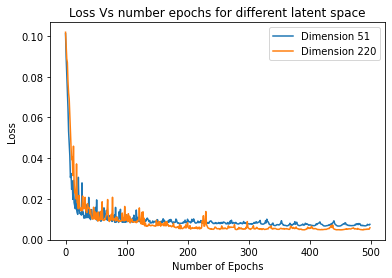

In [ ]:
Dim_51,= plt.plot(to_plot, label="Dimension 51")
Dim_220, =  plt.plot(to_plot_220, label="Dimension 220")
plt.legend(handles=[Dim_51, Dim_220])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for different latent space")
plt.show()


In [ ]:
import tensorflow as tf

with tf.Session() as sess:

  saver = tf.train.import_meta_graph('./checkpoint_dir/MyModel-1000.meta')

  saver.restore(sess,tf.train.latest_checkpoint('./checkpoint_dir'))